In [1]:
from sklearn.model_selection import train_test_split
import DeepMIMOv3 as DeepMIMO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from noise import *
from sklearn.preprocessing import MinMaxScaler
import torch

In [2]:
def create_dataset(scenario_name, 
                   n_bs_y, n_bs_x, n_ue_y, n_ue_x, 
                   n_paths, n_subcarriers):
    # Load the default params, set constant params
    params = DeepMIMO.default_params()
    params['dataset_folder'] = r'scenarios'
    
    # Set params
    # Which scenario
    params['scenario'] = scenario_name
    # For the antennas
    params['bs_antenna']['shape'] = np.array([n_bs_y, n_bs_x])
    params['ue_antenna']['shape'] = np.array([n_ue_y, n_ue_x])
    # For the path
    params['num_paths'] = n_paths
    params['OFDM']['subcarriers'] = n_subcarriers
    
    # Create dataset
    dataset = DeepMIMO.generate_data(params)
    
    return dataset

In [3]:
def generate_H(dataset, user):
    i = 0  # Only one base station in scenario I2
    j = user  # Choose the first user
    H = dataset[i]['user']['channel'][j]
    H = H[:, :, 0]  # Choose the first subcarrier
    return H

def generate_H_abs(dataset, user):
    H = generate_H(dataset, user)
    H_abs = np.abs(H)

    return H_abs

In [4]:
# Noise functions
def gaussian(H_true, std):
    return np.random.normal(0, std, H_true.shape)

def pink(H_true, amplitude):
    return amplitude*pink_noise(H_true)

In [5]:
# SNR
def calculate_snr(y_true, y_noise): ### write own code later
    # Calculate signal power
    signal_power = np.mean(y_true ** 2)
    # Calculate noise power
    noise_power = np.mean((y_noise - y_true) ** 2)
    # Calculate (linear) SNR
    snr = signal_power / noise_power
    # Convert to dB
    snr_db = 10 * np.log10(snr)
    return snr, snr_db

In [6]:
def generate_noisy_H(H_true, noise):
    # noise = np.random.normal(0, 10**(-5), H.shape)
    std = 10**(-4)
    if noise == gaussian:
        print('ww')
        H_added_noise = gaussian(H_true, std)
    elif noise == pink:
        print('wh have pink')
        H_added_noise = np.zeros(H_true.shape)

    H_noise = H_true + H_added_noise

    return H_noise

In [7]:
def plot_heatmat(H):
    plt.figure(figsize=(8, 6))
    plt.imshow(H.T, cmap='viridis', aspect='auto', origin='lower', interpolation='nearest')
    plt.colorbar()
    plt.title('Channel Gain Magnitude of (RX, TX) Antenna Pairs')
    plt.xlabel('RX antenna')
    plt.ylabel('TX antenna')
    # plt.xticks(ticks=np.arange(H.shape[0]), labels=np.arange(1, H.shape[0] + 1))
    # plt.yticks(ticks=np.arange(H.shape[1]), labels=np.arange(1, H.shape[1] + 1))
    plt.show()

In [8]:
def data_generation(scenario_name, 
                    n_bs_y, n_bs_x, n_ue_y, n_ue_x,
                    n_paths, n_subcarriers,user):
    dataset = create_dataset(scenario_name, n_bs_y, n_bs_x, n_ue_y, n_ue_x, n_paths, n_subcarriers)
    #H_true = generate_H_abs(dataset, user)
    # plot_environment(dataset)
    return dataset

Change the Environment Here

In [9]:
scenario_name = 'I2_28B'
n_bs_y, n_bs_x = 32, 1
n_ue_y, n_ue_x = 32, 1
n_paths = 5
n_subcarriers = 2

Change Parameters Here

In [10]:
n_users = 20
n_samples_per_user = 10
n_datapoints = n_users * n_samples_per_user # number of (total) datapoints generated


noise = pink

if noise == pink:
    amplitude = 0.0001
    std = None
elif noise == gaussian:
    amplitude = None
    std = 10**(-3.4)

Generate & Save Datasets


Basestation 1

UE-BS Channels


Reading ray-tracing: 100%|██████████| 402/402 [00:00<00:00, 73597.13it/s]


ToA of some paths of 199 channels with an average total power of 53.50% exceed the useful OFDM symbol duration and are clipped.


Generating channels: 100%|██████████| 201/201 [00:00<00:00, 3552.70it/s]



BS-BS Channels


Generating channels: 100%|██████████| 1/1 [00:00<00:00, 1005.11it/s]


len!! 1024
[0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906 0.00976562 0.01074219
 0.01171875 0.01269531 0.01367188 0.01464844 0.015625   0.01660156
 0.01757812 0.01855469 0.01953125 0.02050781 0.02148438 0.02246094
 0.0234375  0.02441406 0.02539062 0.02636719 0.02734375 0.02832031
 0.02929688 0.03027344 0.03125    0.03222656 0.03320312 0.03417969
 0.03515625 0.03613281 0.03710938 0.03808594 0.0390625  0.04003906
 0.04101562 0.04199219 0.04296875 0.04394531 0.04492188 0.04589844
 0.046875   0.04785156 0.04882812 0.04980469 0.05078125 0.05175781
 0.05273438 0.05371094 0.0546875  0.05566406 0.05664062 0.05761719
 0.05859375 0.05957031 0.06054688 0.06152344 0.0625     0.06347656
 0.06445312 0.06542969 0.06640625 0.06738281 0.06835938 0.06933594
 0.0703125  0.07128906 0.07226562 0.07324219 0.07421875 0.07519531
 0.07617188 0.07714844 0.078125   0.07910156 0.08007812 0.08105469
 0.08203125 0.08300781 0.08398438 0.08496094 0.0859

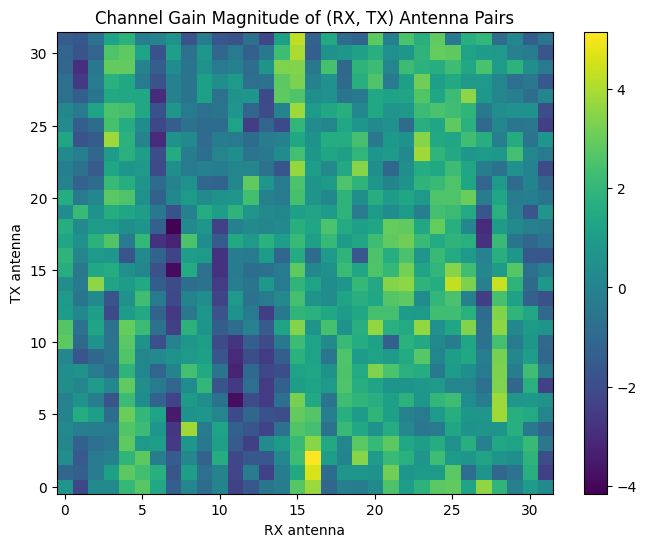

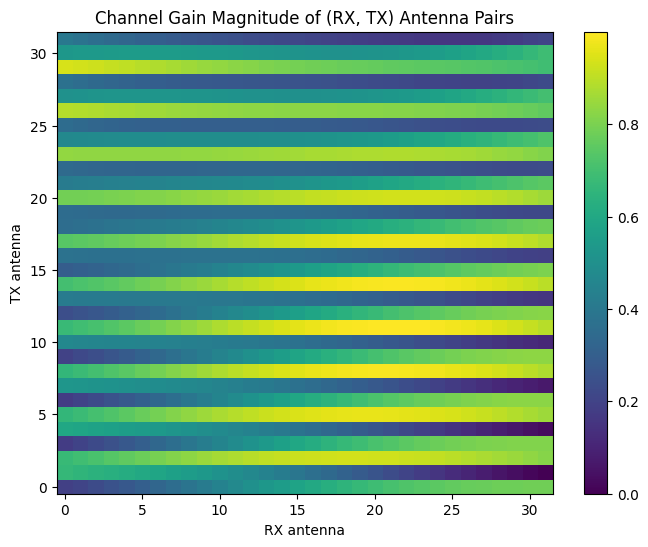

SNR: 0.14717347050237983 DB: -8.421599064538105


In [11]:
scaler = MinMaxScaler()

noisy_data = np.ndarray((n_datapoints, n_bs_y * n_ue_y))
true_data = np.ndarray((n_datapoints, n_bs_y * n_ue_y))
index = 0

dataset_ = data_generation(scenario_name,
                            n_bs_y, n_bs_x, n_ue_y, n_ue_x,
                            n_paths, n_subcarriers, 0)

for user in range(1,n_users+1):
    
    H_true = generate_H_abs(dataset_, user)
    
    H_true = H_true.flatten()
    for i in range(n_samples_per_user):
        if noise == pink:
            H_added_noise = pink(H_true, amplitude)
        elif noise == gaussian:
            H_added_noise = gaussian(H_true, std)

        
        
        H_noise = H_true + H_added_noise
        # scaled-versions
        
        scaled_true = H_true.reshape(-1, 1)
        scaled_true = scaler.fit_transform(scaled_true)
        scaled_noisy = H_noise.reshape(-1, 1)
        scaled_noisy = scaler.transform(scaled_noisy)



        noisy_data[index,:] = scaled_noisy.reshape(1, -1)
        true_data[index,:] = scaled_true.reshape(1, -1)
        index += 1
        

print(noisy_data.shape)
print(true_data.shape)


plot_heatmat(noisy_data[140].reshape(32,32))
plot_heatmat(true_data[140].reshape(32,32))

sum_snr = 0
sum_snr_db = 0
for i in range(noisy_data.shape[0]):
        
    snr_, snr_db = calculate_snr(true_data[i], noisy_data[i])
    sum_snr += snr_
    sum_snr_db += snr_db

snr_ = sum_snr / noisy_data.shape[0]
snr_db_ = sum_snr_db / noisy_data.shape[0]
print(f"SNR: {snr_} DB: {snr_db_}")


# create the datasets in dataframe format
true_data_df = pd.DataFrame(true_data)

noisy_data_df = pd.DataFrame(noisy_data)


# Step 1: Split 80% for training/validation and 20% for testing
X_temp, X_test, y_temp, y_test = train_test_split(
    noisy_data_df,  
    true_data_df,
    test_size=0.2,   # 20% for testing
    random_state=42  
)

# Step 2: Split the remaining 80% into 70% training and 10% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, 
    y_temp,
    test_size=0.125,  # 10% of the original total = 0.1 / 0.8 = 0.125
    random_state=42  
)



In [12]:
save = False
if save:
    folder_name = f"../datasets/deepmimo-gaussian_{round(snr_db_, 3)}"

    os.makedirs(folder_name, exist_ok=True)

    y_train.to_csv(f'{folder_name}/y_data_train.csv', index=False)
    y_val.to_csv(f'{folder_name}/y_data_val.csv', index=False)
    y_test.to_csv(f'{folder_name}/y_data_test.csv', index=False)
    X_train.to_csv(f'{folder_name}/X_data_train.csv', index=False)
    X_val.to_csv(f'{folder_name}/X_data_val.csv', index=False)
    X_test.to_csv(f'{folder_name}/X_data_test.csv', index=False)

    with open(f'{folder_name}/meta_data.txt', "w") as file:
        # Write text to the file
        file.write(f"SNR = {snr_}\n")
        file.write(f"SNR_db = {snr_db_}\n")
    

